In [46]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
train_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/train'
test_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/test'

In [48]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['covid','normal'], batch_size=100)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['covid','normal'], batch_size=11)

Found 130 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [49]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax')
])

In [50]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model.compile(Adam(lr=.0005), loss='categorical_crossentropy', metrics=['acc'])

In [52]:
model.fit_generator(train_batches, steps_per_epoch=10, epochs=10)

Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 5349.1950 - acc: 0.6246
Epoch 2/10
10/10 [==============================] - 19s 2s/step - loss: 980.2762 - acc: 0.8046
Epoch 3/10
10/10 [==============================] - 19s 2s/step - loss: 507.8961 - acc: 0.9138
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 219.3364 - acc: 0.9508
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 90.4070 - acc: 0.9738
Epoch 6/10
10/10 [==============================] - 19s 2s/step - loss: 29.9972 - acc: 0.9862
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 21.9523 - acc: 0.9662
Epoch 8/10
10/10 [==============================] - 19s 2s/step - loss: 11.6895 - acc: 0.9815
Epoch 9/10
10/10 [==============================] - 19s 2s/step - loss: 6.3262 - acc: 0.9969
Epoch 10/10
10/10 [==============================] - 19s 2s/step - loss: 0.0000e+00 - acc: 1.0000


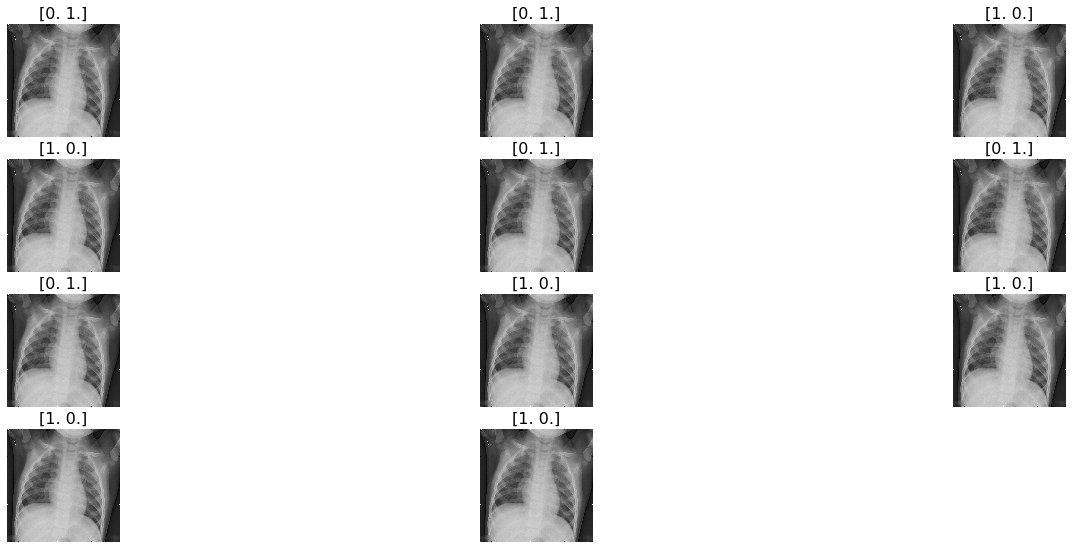

In [54]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [43]:
test_labels = test_labels
test_labels

array([0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [44]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [45]:
predictions

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [39]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[5 0]
 [0 6]]


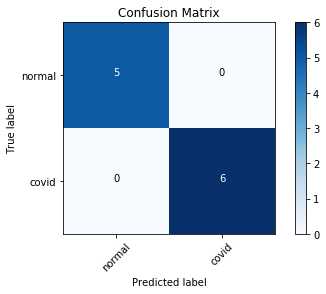

In [41]:
cm_plot_labels = ['normal','covid']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')